# SENTIMENT ANALYSIS OF STUDENT REVIEWS DATASET


### Metric Used

**AUC-ROC** : Area Under the Curve (AUC) of Receiver Operating Curve was the statistic used to assess machine learning models (ROC). In general, binary classification models are seen to benefit from it the most. It tells us how successfully our model distinguishes between positive and negative labels for certain probability thresholds. We may always adjust the probability threshold to get the appropriate accuracy, recall, precision, and specificity scores if our model is doing well in terms of AUC-ROC.


## 1. Importing Libraries

In [1]:
#Importing General libraries 
import time     #To notice execution times
import numpy as np
from numpy import *

import pandas as pd
import scipy    # For Vectorization
import warnings  

#Importing Pre-processing Libraries 
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#Importing Model Development Libraries from Sci-kit
from sklearn.linear_model import  LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn import svm

#Other model development libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

#Importing Model Evaluation Libraries from Sci-kit
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline

#Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Textual data handling/Analytics Libraries
import re, string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


warnings.filterwarnings('ignore')


## Loading Dataset

In [2]:
df = pd.read_csv('/Users/adegbolakehinde/Desktop/DERBY/NATURAL LANGUAGE PROCESSING/course_data_clean.csv', encoding="ISO-8859-1")  #This encoding is used as UTF-08 encoding was giving an error
df

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0
...,...,...,...,...,...,...,...,...,...,...
14833,ASL 102R,American Sign Language 2,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course,1.0
14834,CS 136L,Tools and Techniques for Software Development,1,100%,100%,100%,1,I either designed or helped design the majorit...,liked course,1.0
14835,AFM 417,Special Topics in Accounting,0,NaN,NaN,NaN,1,Topic 3: Intro to Data Analytics,NaN,NaN
14836,ECON 472,Senior Honours Essay,0,100%,0%,NaN,1,Not sure if I liked this course yet. Definitel...,NaN,NaN


## Data pre-processing


###  Pre-Processing and Imputation

### DROPPING COLUMNS THAT'S ARE NOT NEEDED FOR THE ANALYSIS.

In [3]:
df = df.drop(columns = ['course_code', 'course_title', 'course_rating_int'])

###### Then, lets check the missing values in each column of our data

In [4]:
df.isnull().sum()

num_ratings        0
useful             2
easy               3
liked              3
num_reviews        0
reviews            9
course_rating    222
dtype: int64

In [5]:
df.course_rating.isnull().sum()  #Missing values in Y label

222

###### The only way to handle missing values in the target variable is to remove the row entirely:

In [6]:
df_imputated = df[df['course_rating'].notna()]   #Keeping rows with missing values in "course_rating"
df_imputated                                     

,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating
0,2111,21%,10%,23%,86,go to office hours and practice,liked course
1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course
2,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course
3,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course
4,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course
...,...,...,...,...,...,...,...
14830,1,75%,75%,100%,1,This is a really wonderful course! Dr. Fraser ...,liked course
14831,1,50%,25%,100%,1,While this course ended up being relatively in...,liked course
14832,1,25%,25%,0%,1,Personally did not find Computational Biomecha...,disliked course
14833,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course


In [7]:
df_imputated[df_imputated.isnull().any(axis=1)]   #Visualizing rows that still have missing values

,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating
2810,498,68%,73%,71%,125,NaN,disliked course
5982,165,75%,75%,75%,39,NaN,disliked course
6540,136,93%,84%,95%,7,NaN,liked course
6578,135,52%,67%,43%,30,NaN,disliked course
8311,80,37%,74%,25%,12,NaN,disliked course
10542,39,91%,57%,77%,6,NaN,disliked course
11287,31,0%,20%,6%,3,NaN,disliked course
11395,29,90%,68%,83%,10,NaN,liked course
14575,2,100%,NaN,100%,1,Took forensic biomechanics. We had to write an...,liked course
14795,1,NaN,100%,100%,1,Very easy to get a good grade as long as you d...,liked course


###### The best way to handle missing values in the reviews above is to either eliminate the values entirely or replace them with an empty string.
###### Since there are other indicators, I replaced the value in my strategy with an empty string.

In [8]:
df_imputated.reviews.fillna('', inplace = True)   #Replacing missing values in reviews column with empty string


In [ ]:
df_imputated[df_imputated.isnull().any(axis=1)]   #Checking further missing values

## Columns like the useful,easy and liked columns are numerical but considered as object because of % sign, we have to convert them to numerical form

In [10]:
df_imputated['useful'] = df_imputated['useful'].str.replace('%', '')
df_imputated['easy'] = df_imputated['easy'].str.replace('%', '')
df_imputated['liked'] = df_imputated['liked'].str.replace('%', '')
df_imputated[['useful','easy', 'liked' ]] = df_imputated[['useful','easy', 'liked']].astype('float')


#### To handle the missing value in numerical data, we'll visualize the distribution to know the type of imputation to use for each column

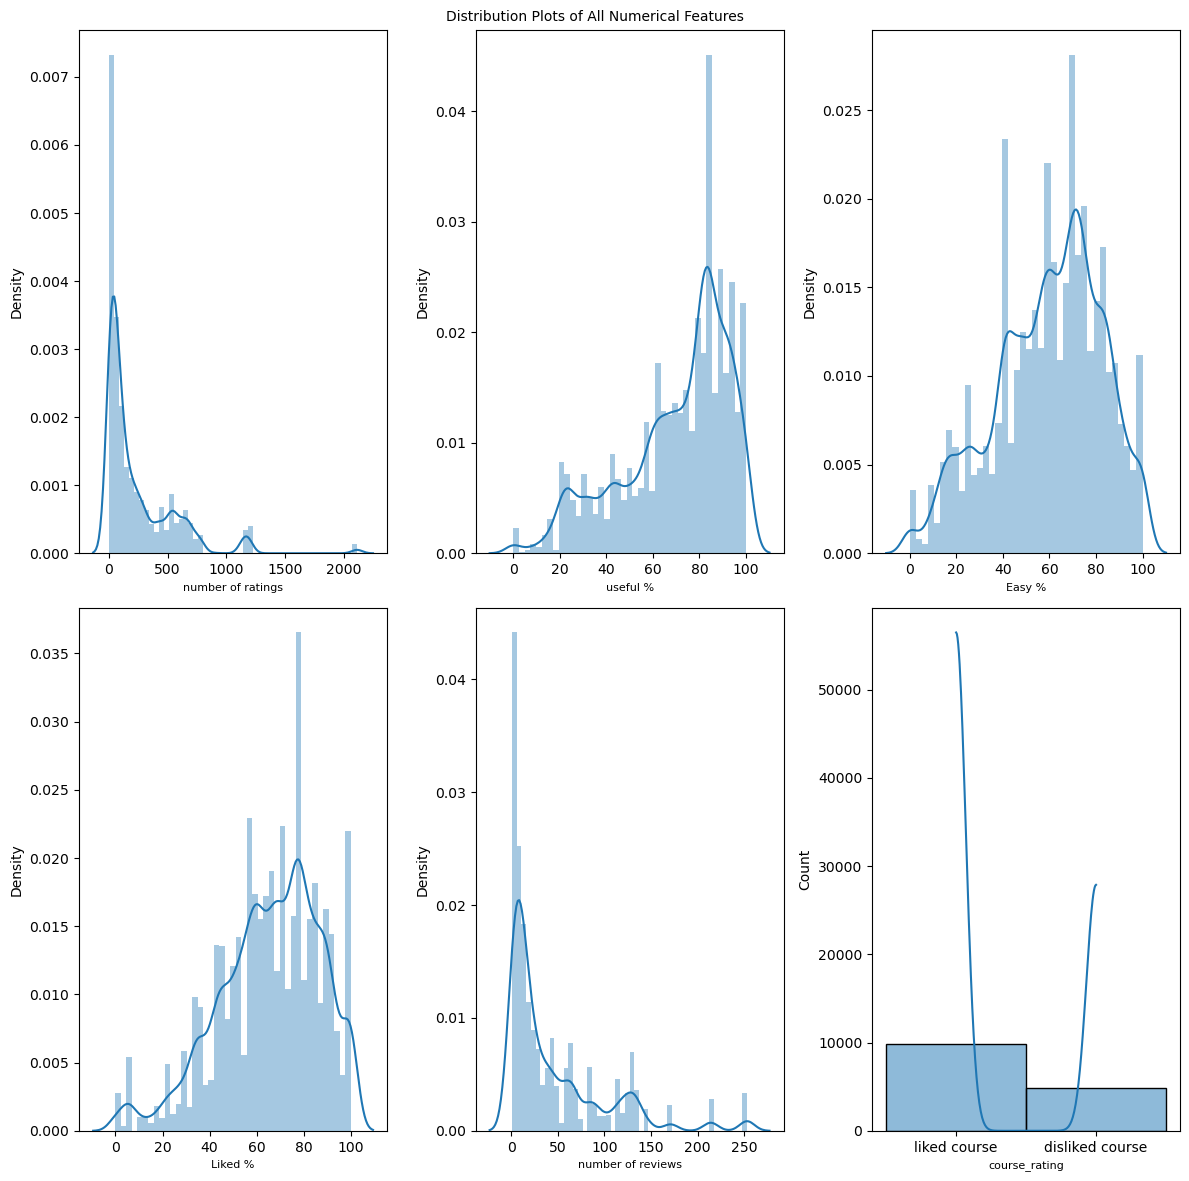

In [11]:
#Visualizing the distribution of each column

fig, axes = plt.subplots(2, 3, figsize=(12,12))
fig.suptitle('Distribution Plots of All Numerical Features', size=10)

sns.distplot(ax=axes[0,0], x= df_imputated.num_ratings, kde=True)
axes[0,0].set_xlabel('number of ratings', size=8)

sns.distplot(ax=axes[0,1], x= df_imputated.useful, kde=True)
axes[0,1].set_xlabel('useful %', size=8)

sns.distplot(ax=axes[0,2],  x= df_imputated.easy, kde=True)
axes[0,2].set_xlabel('Easy %', size=8)

sns.distplot(ax=axes[1,0],x= df_imputated.liked, kde=True)
axes[1,0].set_xlabel('Liked %', size=8)

sns.distplot(ax=axes[1,1], x = df_imputated.num_reviews, kde=True)
axes[1,1].set_xlabel('number of reviews', size=8)

sns.histplot(ax=axes[1,2],x =  df_imputated.course_rating, kde=True)
axes[1,2].set_xlabel('course_rating', size=8)


plt.tight_layout()
plt.show()

###### The columns 'easy' and 'liked' are approximately normally distributed so their missing values can be imputated with mean. 
###### The columns 'useful' is left skewed so appropriate way to fill its missing values would be by replacing it with median of that column.

In [12]:
df_imputated.useful.fillna(df_imputated.useful.median(), inplace = True)    #Replacing missing value with median
df_imputated.easy.fillna(df_imputated.easy.mean(), inplace = True)          #Replacing missing value with mean
df_imputated.liked.fillna(df_imputated.liked.mean(), inplace = True)        #Replacing missing value with mean

###### Final Missing Values Check: Checking if there are no missing values left?

In [13]:
df_imputated.isnull().sum()

num_ratings      0
useful           0
easy             0
liked            0
num_reviews      0
reviews          0
course_rating    0
dtype: int64

###### Now lets see the class labels for our target variable "course_rating":

In [14]:
df_imputated.course_rating.value_counts()

liked course       9786
disliked course    4830
Name: course_rating, dtype: int64

##### The target variable has been labelled  'liked course'  with 0 and 'disliked course' as 1. 

In [15]:
df_imputated['course_rating'] = df_imputated['course_rating'].str.lower()  #Converting each label to lowercase
df_imputated.loc[
    ((df_imputated.course_rating == 'liked course')), 'course_rating'] = 0     #Labeling the liked course

df_imputated.loc[(
    (df_imputated.course_rating == 'disliked course')), 'course_rating'] = 1   #Labeling the disliked course
 

df_imputated[[ 'course_rating']] = df_imputated[['course_rating' ]].astype(int) #Converting to int 


###### Now, lets check whether our labelling was done correctly:

In [16]:
df_imputated.course_rating.value_counts()

0    9786
1    4830
Name: course_rating, dtype: int64

###  Checking Data Imbalanceness

In [17]:
(df_imputated.course_rating.value_counts()[1])*100/df_imputated.shape[0]

33.04597701149425

###### Our dataset is slightly imbalanced so there doesnt seem to be a need for sampling. However, I will still try to use SMOTE and under-sampling to see the effect.

###  Exploratory Data Analysis

To identify the underlying trends in our data, a small-scale exploratory data analysis was conducted. The frequency of each column's values for the "liked" and "disliked" labels was plotted. The graphs could offer insight into the distribution of each column's course rating.

#####  Frequency Distribution of "number of ratings" with Course Rating

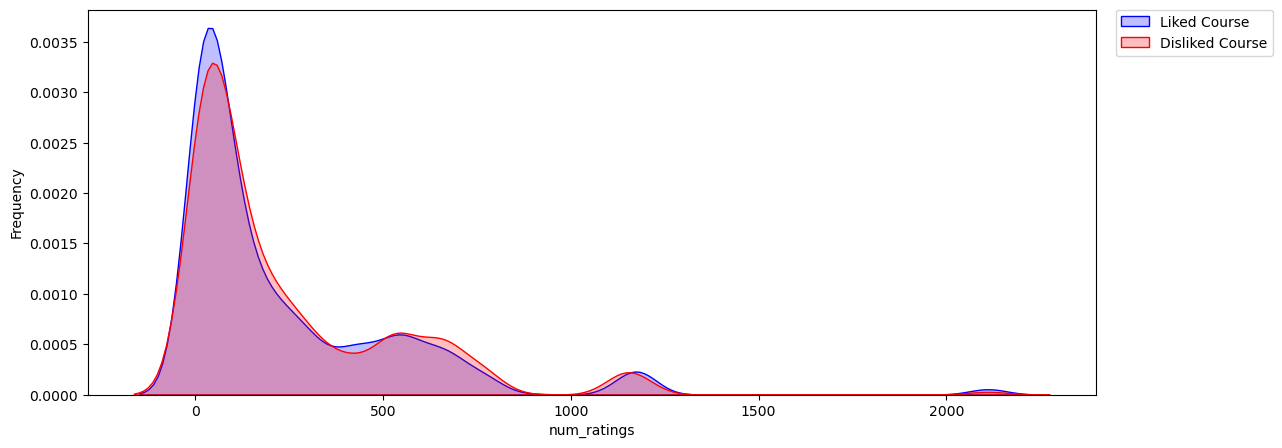

In [18]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_imputated[df_imputated['course_rating']==0]["num_ratings"],shade = True, color="blue", label="Liked Course", ax = ax)
sns.kdeplot(df_imputated[df_imputated['course_rating']==1]["num_ratings"],shade = True, color="red", label="Disliked Course", ax = ax)
ax.set_xlabel("num_ratings")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

##### Num_ratings doesnt seem to have any effect on whether a course is liked or not

#####  Frequency Distribution of "Useful" with Course Rating

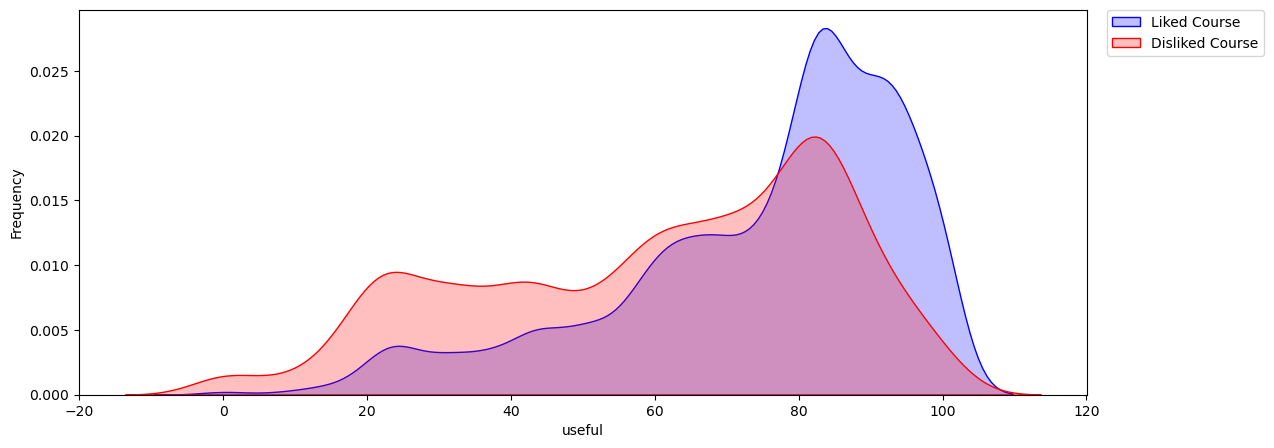

In [19]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_imputated[df_imputated['course_rating']==0]["useful"],shade = True, color="blue", label="Liked Course", ax = ax)
sns.kdeplot(df_imputated[df_imputated['course_rating']==1]["useful"],shade = True, color="red", label="Disliked Course", ax = ax)
ax.set_xlabel("useful")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

##### It can be noticed that more students liked the course when they gave it a higher value of usefulness

#####  Frequency Distribution of "Easy" with Course Rating

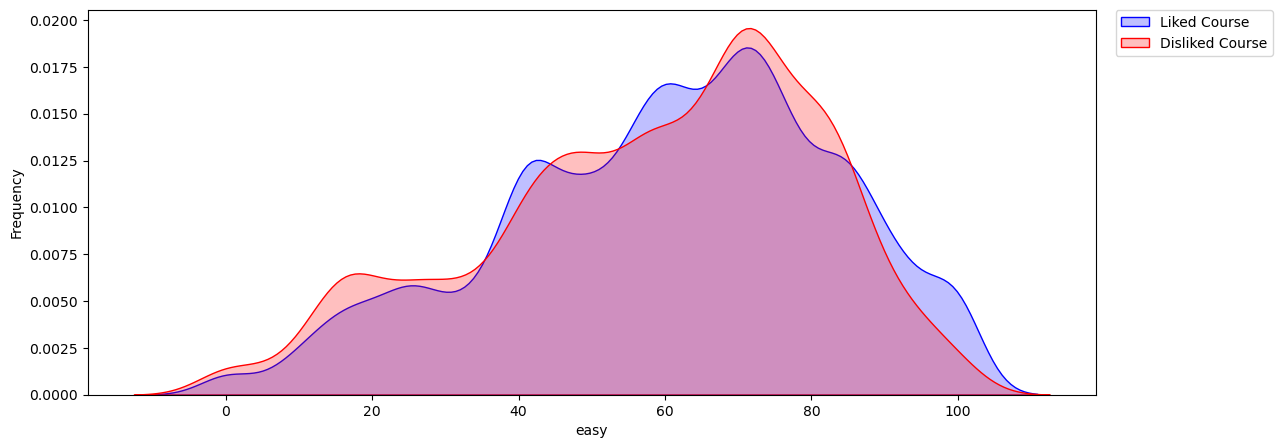

In [20]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_imputated[df_imputated['course_rating']==0]["easy"],shade = True, color="blue", label="Liked Course", ax = ax)
sns.kdeplot(df_imputated[df_imputated['course_rating']==1]["easy"],shade = True, color="red", label="Disliked Course", ax = ax)
ax.set_xlabel("easy")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

##### There seems to be no relationship between students rating a course as easy and whether the course was liked or disliked

#####  Frequency Distribution of "Number of Reviews" with Course Rating

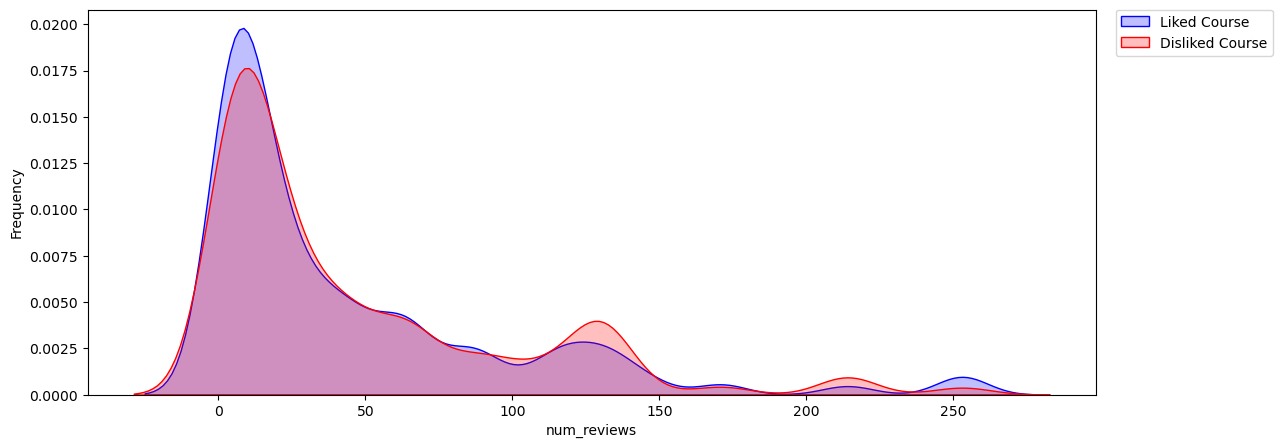

In [21]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_imputated[df_imputated['course_rating']==0]["num_reviews"],shade = True, color="blue", label="Liked Course", ax = ax)
sns.kdeplot(df_imputated[df_imputated['course_rating']==1]["num_reviews"],shade = True, color="red", label="Disliked Course", ax = ax)
ax.set_xlabel("num_reviews")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

##### No apparent impact of number of reviews on whether the course was liked or not

#####  Frequency Distribution of "liked" with Course Rating

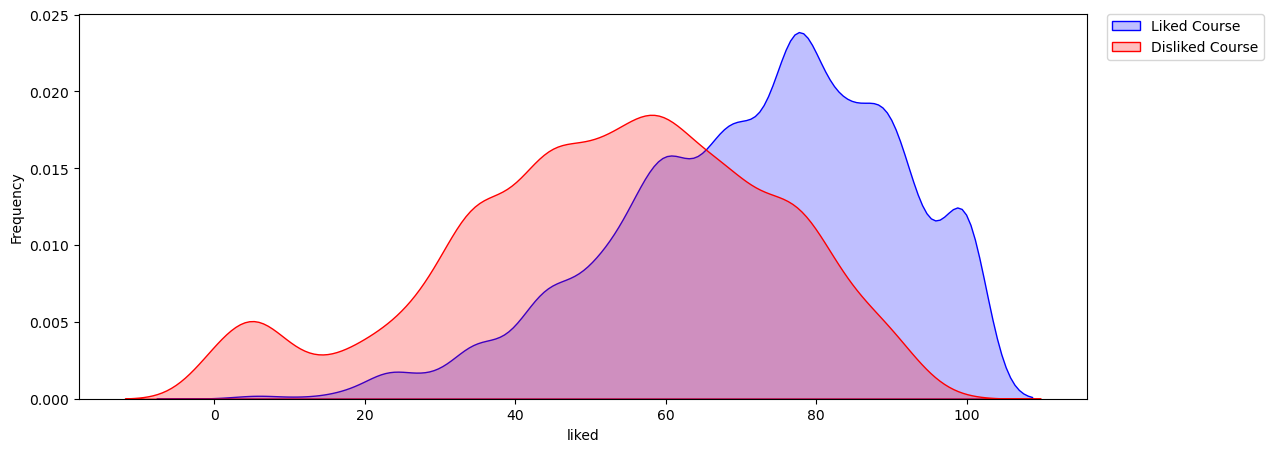

In [22]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_imputated[df_imputated['course_rating']==0]["liked"],shade = True, color="blue", label="Liked Course", ax = ax)
sns.kdeplot(df_imputated[df_imputated['course_rating']==1]["liked"],shade = True, color="red", label="Disliked Course", ax = ax)
ax.set_xlabel("liked")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

##### It can be clearly seen that as the percentage of likeness increases for a course, it is more likely to be considered as a liked course

It shows that this feature will be very important for our machine learning analysis!!!

##### Correlation Analysis Between Numerical Variables

In [23]:
subset = df_imputated [['num_ratings', 'useful', 'easy', 'liked', 'num_reviews', 'course_rating']]  #Numerical columns
subset.corr()  #Finds out a correlation table for each 

,num_ratings,useful,easy,liked,num_reviews,course_rating
num_ratings,1.000000,-0.051329,-0.125104,-0.165818,0.893920,0.014411
useful,-0.051329,1.000000,-0.179602,0.670585,0.015550,-0.296245
easy,-0.125104,-0.179602,1.000000,0.153139,-0.060929,-0.047034
liked,-0.165818,0.670585,0.153139,1.000000,-0.101951,-0.433856
num_reviews,0.893920,0.015550,-0.060929,-0.101951,1.000000,0.021812
course_rating,0.014411,-0.296245,-0.047034,-0.433856,0.021812,1.000000


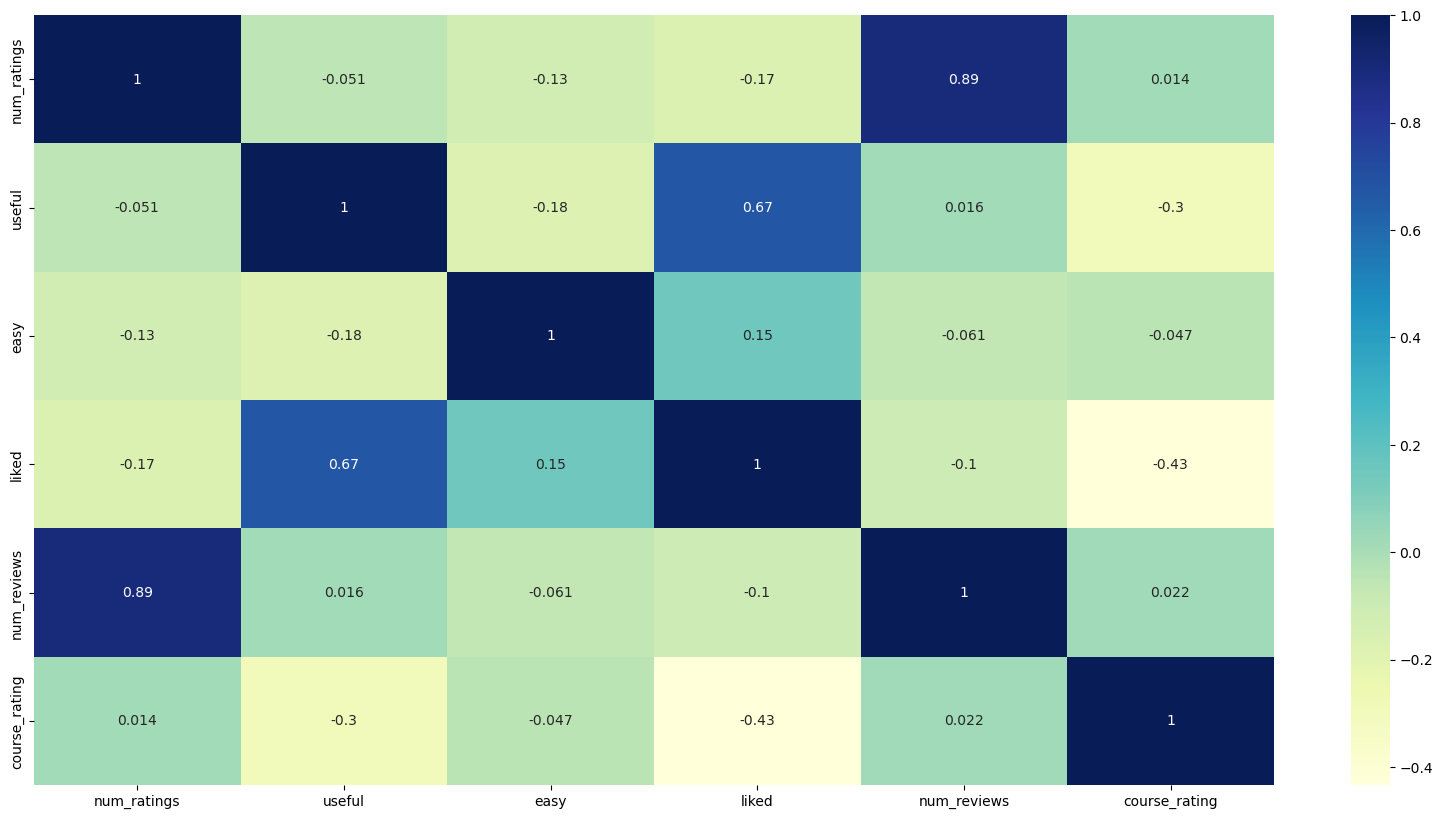

In [24]:
#Now lets try plotting the correlation heatmap

plt.figure(figsize = (20,10))
dataplot = sns.heatmap(subset.corr(), cmap="YlGnBu", annot=True)

plt.show()

##### Discussion:

    1) No link between the course rating and the easy, num ratings, or num reviews columns was found.
    2) A moderately unfavourable link between course ratings and favourable comments columns was found
   

###### Based on the EDA analysis, it shows that liked and useful columns will be important numerical features for machine learning. However, since they both are strongly positively correlated to each other, it is possible that one of them will have to be eliminated later for better results!

##  Machine Learning with numerical features

###### It's vital to establish a base case utilising numerical columns just to determine how much predictability they offer us before digging into textual engineering using the reviews column:

In [25]:
basic_df = df_imputated[['num_ratings', 'useful', 'easy', 'liked',
       'num_reviews', 'course_rating']]   #Numerical Columns DataFrame
basic_df.head()

,num_ratings,useful,easy,liked,num_reviews,course_rating
0,2111,21.0,10.0,23.0,86,0
1,2111,21.0,10.0,23.0,86,1
2,2111,21.0,10.0,23.0,86,1
3,2111,21.0,10.0,23.0,86,0
4,2111,21.0,10.0,23.0,86,0


In [26]:
X = basic_df.drop(columns = ['course_rating'])   
y = basic_df[['course_rating']]
scaler = MinMaxScaler()    
scaler.fit(X)
x_scaled = scaler.transform(X)
x_scaled = pd.DataFrame(x_scaled, columns = X.columns)

In [27]:
trainX, testX, trainy, testy = train_test_split(x_scaled, y, test_size=0.2, random_state=43)  #Train Test Split with test size of 0.2

#### A standard fitting model function is defined and outputs the testing AUC-ROC as well as the ROC curve

In [28]:
def fitting_model(model, name):              
    model.fit(trainX, trainy)  #Fitting the model
    model_probs = model.predict_proba(testX)[:, 1]     #Predicting the probabilities of the test sample
    model_auc = roc_auc_score(testy, model_probs)      #Calculating AUC-ROC  of the model using test probabilities
    print(name, ': ', model_auc)
    model_falsepr, model_truepr, _ = roc_curve(testy, model_probs)    #Creating the AUC-ROC curve 
    plt.plot(model_falsepr, model_truepr, marker = 'x', label = name) # Plotting the AUC-ROC curve of that model

###### Fundamental models were fitted beneath for each sort of calculation on our mathematical dataframe. The justification for this was to estabilish the way that our models will perform assuming we just think about the mathematical segments. Then, at that point, we would later on integrate text segment "audit" to perceive what it means for our models' consistency.

Decision Tree Classifier :  0.6975889576284856
Logistic Regression :  0.758962582539284
K-Nearest Neighbors Classifier :  0.7370316292050075
Random Forest Classifier :  0.7152259627908288
Gradient Boosting Classifier :  0.755756542456866
Naive Bayes :  0.6341340037575636
Support Vector Machine :  0.7550390138248897


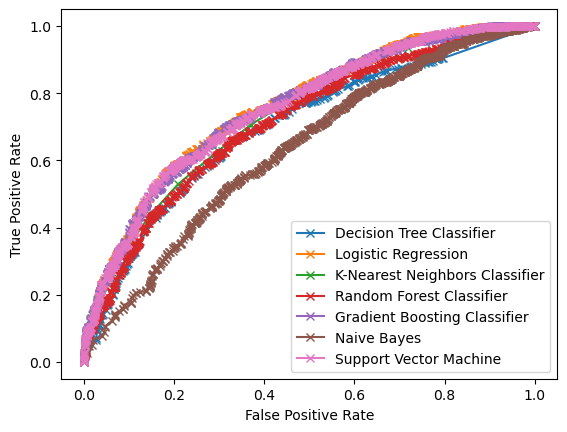

In [29]:

dt = DecisionTreeClassifier()    #Simple Decision Tree Classifier
fitting_model(dt, 'Decision Tree Classifier')

lr = LogisticRegression()       #Simple Logistic Regression
fitting_model(lr, 'Logistic Regression')

knn = KNeighborsClassifier(n_neighbors = 20, n_jobs = -1)   #K Nearest Neighbors Classifier with 20 neighbors
fitting_model(knn, 'K-Nearest Neighbors Classifier')

rf = RandomForestClassifier()   #Simple Random Forest Classifier 
fitting_model(rf, 'Random Forest Classifier')

gb = GradientBoostingClassifier()   #Simple Random Forest Classifier 
fitting_model(gb, 'Gradient Boosting Classifier')

mnb = MultinomialNB()   #Multinomial Naive bayes Classifier
fitting_model(mnb, 'Naive Bayes')

svc = svm.SVC(kernel = 'linear', C =1 , gamma = 'auto', probability = True)    #Support Vector Machine Classifier
fitting_model(svc, 'Support Vector Machine')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###### Our base cases are already giving a clear indication that numerical columns will be important here as the AUC-ROC is above 0.7 for most algorithms. 

###  Feature Selection using Gradient Boosting

###### After base cases were estabilished, feature selection was tried to see if we can eliminate any numerical column. By our EDA it indicated that num_reviews, num_ratings, easy might not be good predictors. With that hypothesis, feature selection was done: 

A gradient boosting classifier was trained on the entire dataset with high number of trees and low learning rate to extract the importance of features

Text(0.5, 1.0, 'Best Features achieved by Gradient Boosting')

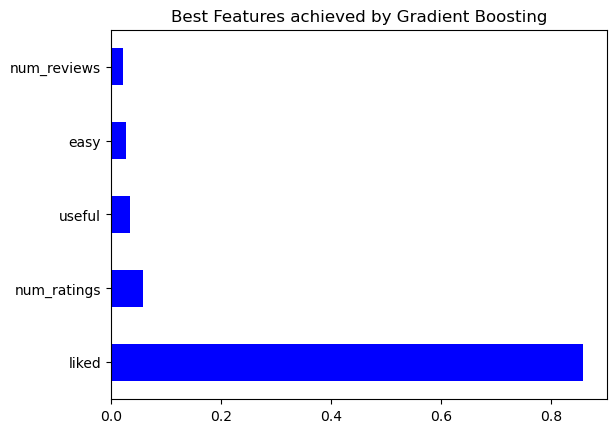

In [30]:
gb = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.05)   #A simple gradient boosting classifier model was run

#Scaling Features
scaler = MinMaxScaler()    
df_imputated[['num_ratings', 'useful', 'easy','liked', 'num_reviews' ]]= scaler.fit_transform(df_imputated[['num_ratings', 'useful', 'easy','liked', 'num_reviews' ]])


x = df_imputated[['num_ratings', 'useful', 'easy','liked', 'num_reviews' ]]
y = df_imputated[['course_rating']]

gb.fit(x, y)
importancegb = pd.Series(gb.feature_importances_, index = x.columns)  #Gives a series of important features with their % importance
importancegb_sorted = importancegb.sort_values()
importancegb_sorted.nlargest(5).plot(kind = 'barh', color = 'blue')  #Plot the feature importance and visualizing result
plt.title("Best Features achieved by Gradient Boosting")


In [31]:
importancegb_sorted.nlargest(5)

liked          0.857983
num_ratings    0.058864
useful         0.034484
easy           0.027210
num_reviews    0.021459
dtype: float64

###### Our EDA gave us a correct indication that liked column will have a very high impact on predictability of our models. Useful column was highly correlated to liked so its importance came out to be very low which is expected because most of the behavior has already been explained by liked column.

Since we know the importance of each feature, now lets try running different iterations of the algorithm and compare it to our full numeric dataset analysis at the top:
  1. Top 1 features
  2. Top 2 features
  3. Top 4 features

####  Iteration 1: Using only 'liked column'

Decision Tree Classifier :  0.7605988819186439
Logistic Regression :  0.7567961628792604
K-Nearest Neighbors Classifier :  0.7383583654859592
Random Forest Classifier :  0.7604127786394154
Gradient Boosting Classifier :  0.7623416751800869
Naive Bayes :  0.5
Support Vector Machine :  0.7567961628792604


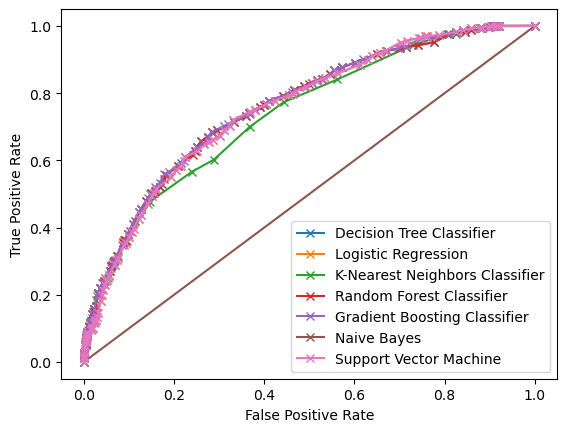

In [32]:

x = df_imputated[['liked']]
y = df_imputated[['course_rating']]
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=43)

dt = DecisionTreeClassifier()    #Simple Decision Tree Classifier
fitting_model(dt, 'Decision Tree Classifier')

lr = LogisticRegression()       #Simple Logistic Regression
fitting_model(lr, 'Logistic Regression')

knn = KNeighborsClassifier(n_neighbors = 20, n_jobs = -1)   #K Nearest Neighbors Classifier with 20 neighbors
fitting_model(knn, 'K-Nearest Neighbors Classifier')

rf = RandomForestClassifier()   #Simple Random Forest Classifier 
fitting_model(rf, 'Random Forest Classifier')

gb = GradientBoostingClassifier()   #Simple Random Forest Classifier 
fitting_model(gb, 'Gradient Boosting Classifier')

mnb = MultinomialNB()   #Multinomial Naive bayes Classifier
fitting_model(mnb, 'Naive Bayes')

svc = svm.SVC(kernel = 'linear', C =1 , gamma = 'auto', probability = True)    #Support Vector Machine Classifier
fitting_model(svc, 'Support Vector Machine')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

####  Iteration 2: Using  'liked column, num_ratings column'

Decision Tree Classifier :  0.7370130971814098
Logistic Regression :  0.757267815930545
K-Nearest Neighbors Classifier :  0.7325544489124312
Random Forest Classifier :  0.7369825584946359
Gradient Boosting Classifier :  0.7568347930129572
Naive Bayes :  0.633006160462267
Support Vector Machine :  0.7562279344937338


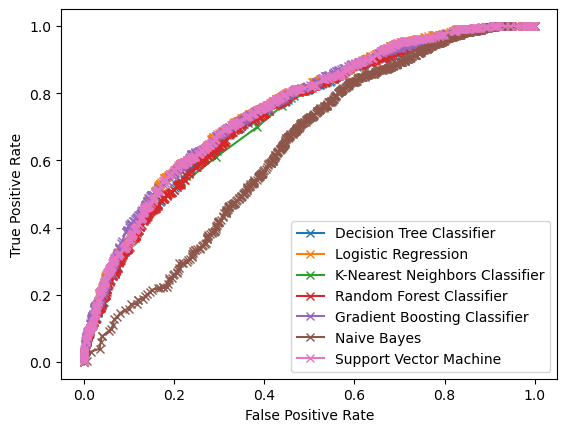

In [33]:

x = df_imputated[['liked', 'num_ratings']]
y = df_imputated[['course_rating']]
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=43)

dt = DecisionTreeClassifier()    #Simple Decision Tree Classifier
fitting_model(dt, 'Decision Tree Classifier')

lr = LogisticRegression()       #Simple Logistic Regression
fitting_model(lr, 'Logistic Regression')

knn = KNeighborsClassifier(n_neighbors = 20, n_jobs = -1)   #K Nearest Neighbors Classifier with 20 neighbors
fitting_model(knn, 'K-Nearest Neighbors Classifier')

rf = RandomForestClassifier()   #Simple Random Forest Classifier 
fitting_model(rf, 'Random Forest Classifier')

gb = GradientBoostingClassifier()   #Simple Random Forest Classifier 
fitting_model(gb, 'Gradient Boosting Classifier')

mnb = MultinomialNB()   #Multinomial Naive bayes Classifier
fitting_model(mnb, 'Naive Bayes')

svc = svm.SVC(kernel = 'linear', C =1 , gamma = 'auto', probability = True)    #Support Vector Machine Classifier
fitting_model(svc, 'Support Vector Machine')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

####  Iteration 3: Using Liked', 'num_ratings', 'useful' and 'easy' column:

Decision Tree Classifier :  0.6984991149001124
Logistic Regression :  0.7569164905254377
K-Nearest Neighbors Classifier :  0.7304227441698514
Random Forest Classifier :  0.7152906943662127
Gradient Boosting Classifier :  0.7568890840116662
Naive Bayes :  0.6383846235362964
Support Vector Machine :  0.7529151395148159


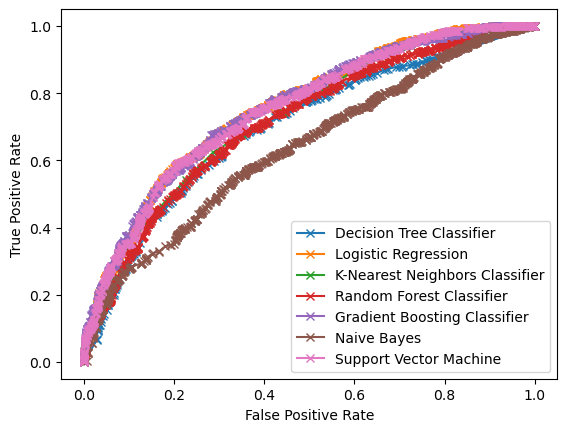

In [34]:

x = df_imputated[['liked', 'num_ratings', 'useful','easy']]
y = df_imputated[['course_rating']]
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=43)

dt = DecisionTreeClassifier()    #Simple Decision Tree Classifier
fitting_model(dt, 'Decision Tree Classifier')

lr = LogisticRegression()       #Simple Logistic Regression
fitting_model(lr, 'Logistic Regression')

knn = KNeighborsClassifier(n_neighbors = 20, n_jobs = -1)   #K Nearest Neighbors Classifier with 20 neighbors
fitting_model(knn, 'K-Nearest Neighbors Classifier')

rf = RandomForestClassifier()   #Simple Random Forest Classifier 
fitting_model(rf, 'Random Forest Classifier')

gb = GradientBoostingClassifier()   #Simple Random Forest Classifier 
fitting_model(gb, 'Gradient Boosting Classifier')

mnb = MultinomialNB()   #Multinomial Naive bayes Classifier
fitting_model(mnb, 'Naive Bayes')

svc = svm.SVC(kernel = 'linear', C =1 , gamma = 'auto', probability = True)    #Support Vector Machine Classifier
fitting_model(svc, 'Support Vector Machine')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###### It seems like from the results above, tree-based algorithms are performing better with just 'liked' column compared to other iterations. However, Naive bayes/SVM does not perform well on a single column. 
###### From the analysis above, 'liked' column seems to be the best numerical feature to move forward with.

##  Sentiment Analysis of Reviews

The dataset above excluded the "reviews" column which can contain very important information and sentiments. However, to utilize the column, we will have to do sentiment analysis on the data

In [35]:
df_text_based = df_imputated[['liked', 'reviews']]   #Taking liked as the only numerical column and incorporating reviews
df_text_based  

,liked,reviews
0,0.23,go to office hours and practice
1,0.23,One of my least favourite courses. Although th...
2,0.23,It starts with a very low pace but after midte...
3,0.23,Took this in 2018 with no programming experien...
4,0.23,I loved everything about cs 115. Great instruc...
...,...,...
14830,1.00,This is a really wonderful course! Dr. Fraser ...
14831,1.00,While this course ended up being relatively in...
14832,0.00,Personally did not find Computational Biomecha...
14833,1.00,Took this online with Georgia Whalen. As it wa...


####  Removing Punctuations and Lower Casing:

In [36]:
#Lets start with removing all punctuations and turning each letter to lowercase:

def lower_cased_punctuation_removal(text):
    for punc in string.punctuation:  #String.punctuation has all punctation marks
        text = text.replace(punc, '') #Reomval of that punctuation from each text
    return text.lower()  #Converting the text to lowercase

df_text_based['reviews'] = df_text_based['reviews'].apply(lower_cased_punctuation_removal) #Applying the function to each review

#### Removing Stop Words:

In [37]:
#Now lets remove the stop words

def remove_stop_words(text):
    stop_words = stopwords.words('english')  #Creates a list of all stop words available in english from stopwords nltk library
    text_words = text.split()  #Creates list of individual words in text

    result_words  = [word for word in text_words if word not in stop_words]   #Keeps all non-stop words
    resultant_text = ' '.join(result_words)  #joins remaining words back into a sentence

    return resultant_text
    
df_text_based['reviews'] = df_text_based['reviews'].apply(remove_stop_words) #Applying the function to each review

####  Stemming the text:

##### Converting different forms of words to its root form:

In [38]:
# Now lets stem the strings to bring it to its root form
stemmer = PorterStemmer()  #Quite popular stemmer and is best for most use-cases.

def stemming_text(text):
    text_words = text.split()   #Splits the text into words
    stemmed_words  = [stemmer.stem(word) for word in text_words]   #Stems each word from the list 
    stemmed_text = ' '.join(stemmed_words)  #Convert the words back into a sentence

    return stemmed_text

df_text_based['reviews'] = df_text_based['reviews'].apply(stemming_text) #Applying the function to each review

#### Bag of Words Transformer:

###### Making a sack of words vector which is contrasted with each survey and each word present in the audit is distinguished by the vector

For instance, assuming our complete pack of words had 100 words. Then a 100 word vector will be a pack of words vector, a solitary survey will be addressed by a 100 element vector where on the off chance that a word is available in the survey, it will be given a worth of 1 and in the event that it isn't, then, at that point, it will be given a worth of 0

In [39]:
#Now lets convert each text to a vector using bag of words method

bag_of_words_transformer = CountVectorizer()    #initalizes the bag of words transformer
sparse_bag = bag_of_words_transformer.fit_transform(df_text_based['reviews'])  #Transforms the reviews into a vector form
sparse_bag.shape  #Shape of our reviews vector (11268 is the number of words in the bag and each column has a 0 or 1 value)

(14616, 11268)

#### TF-IDF Transform:

###### The term frequency and Inverse document frequency transformation finds out how important a word is to a document or a review in our case

At first, the term frequency is calculated, then its inverse document frequency is calculated. 

In [40]:
## term weighting and normalization of 'sparse_bag' using TF-IDF
## TF-IDF quantifies the importance or relevance of words in a document

tfidf_transformer=TfidfTransformer().fit(sparse_bag)  #Fits the sparse bag vector to tfidf_transformer object
df_tfidf = tfidf_transformer.transform(sparse_bag)    
df_tfidf.shape  #Final shape of our transformed features from reviews

(14616, 11268)

###### sparse_bag or df_tfidf is a sci-py sparse matrix object and our numerical column liked is a dataframe object, so either we can convert this sci-py object to an nd-array and concatenate the two arrays or we can convert our liked column to a sparse matrix and concatenate the two. 

###### As per an experiement, scipy sparse matrix multiplications are far superior in terms of computation time than numpy nd array so it was decided to convert our liked column to a sparse matrix.

In [41]:
text_based_sparse = scipy.sparse.csr_matrix(df_text_based.drop(columns = ['reviews']))   #Creating sparse matrix of liked column
text_based_sparse.shape

(14616, 1)

In [42]:
sparse_x = scipy.sparse.hstack((text_based_sparse,df_tfidf))  #Concatenating the reviews sparse matrix and liked sparse matrix to create our features sparse matrix
sparse_x.shape

(14616, 11269)

###### Once we have our final features matrix, we can start using it for machine learning methodology. The data is split into train-test using 0.2 test size. 

In [43]:
trainX, testX, trainy, testy = trin_test_split(sparse_x, df_imputated['course_rating'], test_size=0.2, random_state=43)

Decision Tree Classifier :  0.6611591754658978
Logistic Regression :  0.854190560361411
K-Nearest Neighbors Classifier :  0.7664349032654469
Random Forest Classifier :  0.8362763578883516
Gradient Boosting Classifier :  0.8321763434281529
Naive Bayes :  0.8122925261653904
Support Vector Machine :  0.8487103016648021


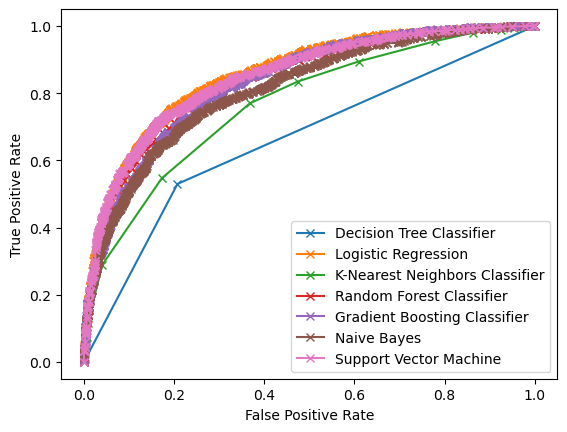

In [44]:
dt = DecisionTreeClassifier()    #Simple Decision Tree Classifier
fitting_model(dt, 'Decision Tree Classifier')

lr = LogisticRegression()       #Simple Logistic Regression
fitting_model(lr, 'Logistic Regression')

knn = KNeighborsClassifier(n_neighbors = 20, n_jobs = -1)   #K Nearest Neighbors Classifier with 20 neighbors
fitting_model(knn, 'K-Nearest Neighbors Classifier')

rf = RandomForestClassifier()   #Simple Random Forest Classifier 
fitting_model(rf, 'Random Forest Classifier')

gb = GradientBoostingClassifier()   #Simple Random Forest Classifier 
fitting_model(gb, 'Gradient Boosting Classifier')

mnb = MultinomialNB()   #Multinomial Naive bayes Classifier
fitting_model(mnb, 'Naive Bayes')

svc = svm.SVC(kernel = 'linear', C =1 , gamma = 'auto', probability = True)    #Support Vector Machine Classifier
fitting_model(svc, 'Support Vector Machine')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###### We can clearly see that addition of review column significantly impacted the predictability of our model as most of the algorithms have an AUC-ROC > 0.8 now compared to 0.7 earlier. 

## Machine Learning Models (Hyperparameter Tuning)

Now lets keep the dataset formed by "liked" column and extracted features from reviews and start hyperparameter tuning of our best models observed. The following models are chosen for the hyperparameter tuning:
   1. Naive Bayes
   2. Support Vector Machine
   3. Logistic Regression
   4. Random Forest
   5. Gradient Boosting
   6. XGBoost Classifier


#### Dataset

###### The final dataset is used below for extensive hyperparameter tuning. The data is train-test split using a test size of 0.2.

In [45]:
text_based_sparse = scipy.sparse.csr_matrix(df_text_based[['liked']]) #Sparse matrix of liked column
sparse_x = scipy.sparse.hstack((text_based_sparse,df_tfidf))  #Concatenating the sparse matrix of liked and reviews

trainX, testX, trainy, testy = train_test_split(sparse_x, df_imputated['course_rating'], test_size=0.2, random_state=43)


###  Multinomial Naive Bayes 

In [46]:
#Cv = 10 means the data is split into 10 folds using Stratified K-Fold and then the test performance is evaluated
#Scoring metric AUC-ROC is used for evaluation

params = {'alpha': (1, 0.1 ,0.01, 0.001, 0.0001, 0.00001)}   #Different parameter values
grid = GridSearchCV(estimator=MultinomialNB(), param_grid=params, verbose=1, cv=10, n_jobs=-1 , scoring = 'roc_auc') #Grid Search
grid.fit(trainX, trainy)
print(grid.best_estimator_)  #Printing best paramaters

Fitting 10 folds for each of 6 candidates, totalling 60 fits
MultinomialNB(alpha=1)


Test AUC-ROC %.3f %  0.8122925261653904


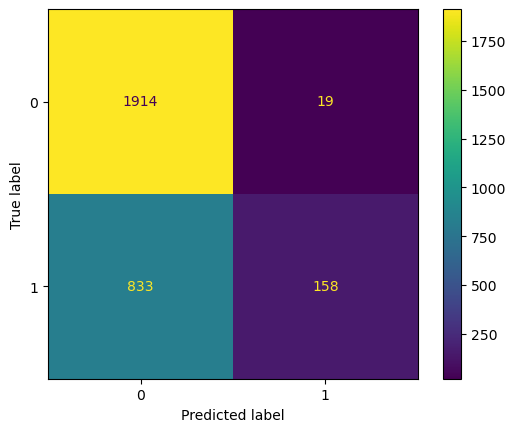

TPR or Recall:  15.943491422805248
precision:  89.26553672316385
Accuracy:  70.86183310533517
TNR or Specifity:  99.01707190894982


In [47]:
''' Best Parameters: alpha = 1 '''

#Evaluating the model with best params deduced above:

model = MultinomialNB(alpha=1)  #Initializing the model
model.fit(trainX, trainy)       #Fitting the model on train set


md_probs = model.predict_proba(testX)   #Predicting Probabilities of test set
md_probs = md_probs[:,1]             
md_auc = roc_auc_score(testy, md_probs) #Calculating AUC-ROC of test dataset
print('Test AUC-ROC %.3f % ', md_auc)   

pred = model.predict(testX)     #Predicting class labels of test set
confusion = confusion_matrix(testy, pred)   #Creating Confusion Matrix of test set

display = ConfusionMatrixDisplay(confusion_matrix = confusion)   #Displaying the confusion matrix of test set
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)  #Recall Calculation
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)   #Precision Calculation
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100) #Accuracy Calculation
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100) #Specificity Calculation

###  Support Vector Machine

In [48]:
#Cv = 10 means the data is split into 10 folds using Stratified K-Fold and then the test performance is evaluated
#Scoring metric AUC-ROC is used for evaluation

params = {'C': [0.1, 1, 10],
          'gamma': [1, 0.1, 0.01]}

grid = GridSearchCV(estimator=svm.SVC(), param_grid=params, verbose=2, cv=10, n_jobs=-1, scoring = 'roc_auc')
grid.fit(trainX, trainy)
print(grid.best_estimator_) #Printing best paramaters

Fitting 10 folds for each of 9 candidates, totalling 90 fits
SVC(C=1, gamma=1)


Test AUC-ROC %.3f %  0.848700383116961


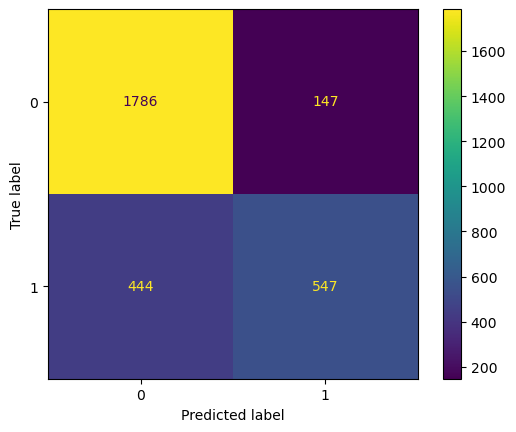

TPR or Recall:  55.196770938446015
precision:  78.81844380403457
Accuracy:  79.78796169630643
TNR or Specifity:  92.39524055871702


In [49]:
''' Best Parameters: C =1 , gamma = 1 '''

#Evaluating the model with best params deduced above:

model = svm.SVC(C = 1, gamma = 1, probability  = True)  #Initializing the model
model.fit(trainX, trainy)       #Fitting the model on train set


md_probs = model.predict_proba(testX)   #Predicting Probabilities of test set
md_probs = md_probs[:,1]             
md_auc = roc_auc_score(testy, md_probs) #Calculating AUC-ROC of test dataset
print('Test AUC-ROC %.3f % ', md_auc)   

pred = model.predict(testX)     #Predicting class labels of test set
confusion = confusion_matrix(testy, pred)   #Creating Confusion Matrix of test set

display = ConfusionMatrixDisplay(confusion_matrix = confusion)   #Displaying the confusion matrix of test set
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)  #Recall Calculation
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)   #Precision Calculation
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100) #Accuracy Calculation
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100) #Specificity Calculation

###  Logistic Regression 

In [50]:
#Cv = 10 means the data is split into 10 folds using Stratified K-Fold and then the test performance is evaluated
#Scoring metric AUC-ROC is used for evaluation

params = {'class_weight': [None, 'balanced'],
          'penalty':['l1', 'l2', 'elasticnet', 'none'],
         'l1_ratio' :[0, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8]}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params, verbose=2, cv=10, n_jobs=-1, scoring = 'roc_auc')
grid.fit(trainX, trainy)
print(grid.best_estimator_) #Printing best paramaters

Fitting 10 folds for each of 56 candidates, totalling 560 fits


/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elastic

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-pack

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the d

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-pa

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-pa

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-pa

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documenta

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentati

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-pa

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-pack

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'e

LogisticRegression(l1_ratio=0)


Test AUC-ROC %.3f %  0.8538251401777925


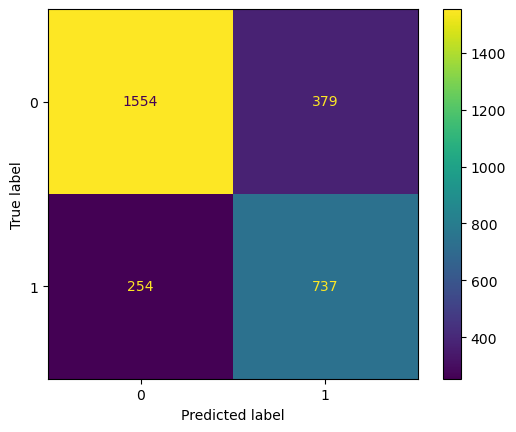

TPR or Recall:  74.36932391523713
precision:  66.0394265232975
Accuracy:  78.3515731874145
TNR or Specifity:  80.39317123642007


In [51]:
''' Best Parameters: class_weight = balanced '''

#Evaluating the model with best params deduced above:
 
model = LogisticRegression(class_weight = 'balanced') #Initializing the model
model.fit(trainX, trainy)       #Fitting the model on train set


md_probs = model.predict_proba(testX)   #Predicting Probabilities of test set
md_probs = md_probs[:,1]             
md_auc = roc_auc_score(testy, md_probs) #Calculating AUC-ROC of test dataset
print('Test AUC-ROC %.3f % ', md_auc)   

pred = model.predict(testX)     #Predicting class labels of test set
confusion = confusion_matrix(testy, pred)   #Creating Confusion Matrix of test set

display = ConfusionMatrixDisplay(confusion_matrix = confusion)   #Displaying the confusion matrix of test set
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)  #Recall Calculation
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)   #Precision Calculation
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100) #Accuracy Calculation
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100) #Specificity Calculation

### Random Forest Classifier

#### Gridsearch: Trial 1

In [52]:
#Cv = 5 means the data is split into 5 folds using Stratified K-Fold and then the test performance is evaluated
#Scoring metric AUC-ROC is used for evaluation


params = {
    "min_samples_split": [2, 4, 6, 10],
    "min_samples_leaf": [5, 10],
    "max_depth":[5,10,20],
    "max_features":['auto', 'sqrt'],
    "n_estimators":[50, 100, 200, 400, 800, 1000]
    }

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, verbose=2, cv=5, n_jobs=-1, scoring = 'roc_auc')
grid.fit(trainX, trainy)
print(grid.best_estimator_) #Printing best paramaters

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

[CV] END .....................................C=0.1, gamma=1; total time=  13.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=  14.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=  13.9s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.0s
[CV] END .......................................C=1, gamma=1; total time=  15.0s
[CV] END .....................................C=1, gamma=0.1; total time=  12.4s
[CV] END ....................................C=1, gamma=0.01; total time=  13.8s
[CV] END ......................................C=10, gamma=1; total time=  44.5s
[CV] END ......................................C=10, gamma=1; total time=  45.9s
[CV] END ..........class_weight=None, l1_ratio=0, penalty=l2; total time=   0.2s
[CV] END ..class_weight=None, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END ..class_weight=None, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END ........class_weigh

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

[CV] END .....................................C=0.1, gamma=1; total time=  13.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=  14.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=  13.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.0s
[CV] END .......................................C=1, gamma=1; total time=  14.8s
[CV] END .....................................C=1, gamma=0.1; total time=  12.4s
[CV] END ....................................C=1, gamma=0.01; total time=  13.8s
[CV] END ....................................C=1, gamma=0.01; total time=  14.2s
[CV] END ......................................C=10, gamma=1; total time=  44.4s
[CV] END ....................................C=10, gamma=0.1; total time=  11.6s
[CV] END ...................................C=10, gamma=0.01; total time=  11.6s
[CV] END ...................................C=10, gamma=0.01; total time=  10.6s
[CV] END ..........class_wei

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END .....................................C=0.1, gamma=1; total time=  13.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=  14.5s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.2s
[CV] END .......................................C=1, gamma=1; total time=  14.9s
[CV] END .......................................C=1, gamma=1; total time=  15.1s
[CV] END .....................................C=1, gamma=0.1; total time=  12.2s
[CV] END ....................................C=1, gamma=0.01; total time=  13.8s
[CV] END ......................................C=10, gamma=1; total time=  45.4s
[CV] END ....................................C=10, gamma=0.1; total time=  11.4s
[CV] END ....................................C=10, gamma=0.1; total time=  11.4s
[CV] END ...................................C=10, gamma=0.01; total time=  11.3s
[CV] END ...................................C=10, gamma=0.01; total time=  10.8s
[CV] END ..........class_wei

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END .....................................C=0.1, gamma=1; total time=  13.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=  14.5s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.2s
[CV] END .......................................C=1, gamma=1; total time=  14.2s
[CV] END .......................................C=1, gamma=1; total time=  14.8s
[CV] END .....................................C=1, gamma=0.1; total time=  11.8s
[CV] END ....................................C=1, gamma=0.01; total time=  13.7s
[CV] END ......................................C=10, gamma=1; total time=  45.3s
[CV] END ......................................C=10, gamma=1; total time=  43.2s
[CV] END ..........class_weight=None, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ..........class_weight=None, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ..........class_weight=None, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ..........class_wei

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END .....................................C=0.1, gamma=1; total time=  13.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=  14.5s
[CV] END ..................................C=0.1, gamma=0.01; total time=  13.9s
[CV] END ..................................C=0.1, gamma=0.01; total time=  13.8s
[CV] END .......................................C=1, gamma=1; total time=  14.9s
[CV] END .....................................C=1, gamma=0.1; total time=  12.2s
[CV] END ....................................C=1, gamma=0.01; total time=  13.9s
[CV] END ......................................C=10, gamma=1; total time=  45.8s
[CV] END ....................................C=10, gamma=0.1; total time=  11.6s
[CV] END ....................................C=10, gamma=0.1; total time=  12.1s
[CV] END ...................................C=10, gamma=0.01; total time=  11.8s
[CV] END ...................................C=10, gamma=0.01; total time=  10.8s
[CV] END ..........class_wei

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END .....................................C=0.1, gamma=1; total time=  13.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=  14.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=  13.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.1s
[CV] END .......................................C=1, gamma=1; total time=  15.0s
[CV] END .....................................C=1, gamma=0.1; total time=  12.2s
[CV] END ....................................C=1, gamma=0.01; total time=  13.5s
[CV] END ....................................C=1, gamma=0.01; total time=  13.6s
[CV] END ......................................C=10, gamma=1; total time=  43.6s
[CV] END ....................................C=10, gamma=0.1; total time=  11.6s
[CV] END ...................................C=10, gamma=0.01; total time=  11.5s
[CV] END ...................................C=10, gamma=0.01; total time=  10.8s
[CV] END ..........class_wei

[CV] END .....................................C=0.1, gamma=1; total time=  13.5s
[CV] END .....................................C=0.1, gamma=1; total time=  13.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=  13.9s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.1s
[CV] END .......................................C=1, gamma=1; total time=  14.9s
[CV] END .....................................C=1, gamma=0.1; total time=  12.2s
[CV] END .....................................C=1, gamma=0.1; total time=  12.1s
[CV] END ....................................C=1, gamma=0.01; total time=  14.1s
[CV] END ......................................C=10, gamma=1; total time=  45.2s
[CV] END ....................................C=10, gamma=0.1; total time=  11.6s
[CV] END ....................................C=10, gamma=0.1; total time=  11.8s
[CV] END ...................................C=10, gamma=0.01; total time=  11.2s
[CV] END ..........class_wei

[CV] END .....................................C=0.1, gamma=1; total time=  13.4s
[CV] END .....................................C=0.1, gamma=1; total time=  13.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=  13.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=  13.9s
[CV] END .......................................C=1, gamma=1; total time=  14.7s
[CV] END .....................................C=1, gamma=0.1; total time=  12.1s
[CV] END .....................................C=1, gamma=0.1; total time=  12.0s
[CV] END ....................................C=1, gamma=0.01; total time=  13.3s
[CV] END ......................................C=10, gamma=1; total time=  44.5s
[CV] END ....................................C=10, gamma=0.1; total time=  11.4s
[CV] END ....................................C=10, gamma=0.1; total time=  11.5s
[CV] END ...................................C=10, gamma=0.01; total time=  11.6s
[CV] END ..........class_wei

RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=5,
                       min_samples_split=4, n_estimators=1000)
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   9.5s
[CV] END

[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=400; total time=   4.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=800; total time=   9.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=10, max_fea

[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=800; total time=  10.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=1000; total time=  11.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=800; total time=   9.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=1000; total time=  11.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=  11.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   9.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=  12.0s
[CV] END max_depth=10, max_fea

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=  12.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=  12.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=1000; total time=  12.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  12.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   4.7s
[CV] END max_depth=10, max_feature

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=  13.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   2.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   9.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=  12.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=800; total time=   9.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=au

[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=200; total time=   2.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=400; total time=   5.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=1000; total time=  11.8s
[CV] END max_depth=10, max_feature

[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=400; total time=   4.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=1000; total time=  11.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=  11.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   4.7s
[CV] END max_depth=10, max_f

[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   9.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=200; total time=   2.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=400; total time=   5.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=800; total time=   9.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_featu

#### Gridsearch: Trial 2

Last trial of gridsearch for random forest was done on the best params observed in Gridsearch trial 2 and only number of trees (estimators) were tweaked to get the optimum ones!

In [53]:
#Cv = 5 means the data is split into 5 folds using Stratified K-Fold and then the test performance is evaluated
#Scoring metric AUC-ROC is used for evaluation

params = {
    "min_samples_split": [6],
    "min_samples_leaf": [5],
    "max_depth":[20],
    "n_estimators":[750, 800, 850, 900]
    }

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, verbose=2, cv=5, n_jobs=-1, scoring = 'roc_auc')
grid.fit(trainX, trainy)
print(grid.best_estimator_) #Printing best paramaters

Fitting 5 folds for each of 4 candidates, totalling 20 fits
RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=6,
                       n_estimators=850)


Test AUC-ROC %.3f %  0.8412583400631551


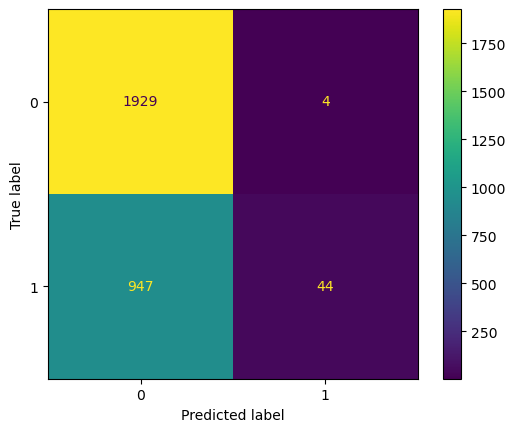

TPR or Recall:  4.439959636730576
precision:  91.66666666666666
Accuracy:  67.47606019151847
TNR or Specifity:  99.79306777030523


In [54]:
''' Best Parameters: max_depth=20, min_samples_leaf=5, min_samples_split=6,
                       n_estimators=800 '''

#Evaluating the model with best params deduced above:

model = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=6,
                       n_estimators=800)  #Initializing the model
model.fit(trainX, trainy)       #Fitting the model on train set


md_probs = model.predict_proba(testX)   #Predicting Probabilities of test set
md_probs = md_probs[:,1]             
md_auc = roc_auc_score(testy, md_probs) #Calculating AUC-ROC of test dataset
print('Test AUC-ROC %.3f % ', md_auc)   

pred = model.predict(testX)     #Predicting class labels of test set
confusion = confusion_matrix(testy, pred)   #Creating Confusion Matrix of test set

display = ConfusionMatrixDisplay(confusion_matrix = confusion)   #Displaying the confusion matrix of test set
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)  #Recall Calculation
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)   #Precision Calculation
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100) #Accuracy Calculation
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100) #Specificity Calculation

### Gradient Boosting Classifier

#### Gridsearch: Trial 1

Since it is computationally expensive and time-taking to try every possible iteration in grid search,
a few values are tried with long ranges then the best params obtained for it are tuned further in the next iterations

In [55]:
#Cv = 5 means the data is split into 5 folds using Stratified K-Fold and then the test performance is evaluated
#Scoring metric AUC-ROC is used for evaluation


params = {
     'n_estimators': [100, 300, 500, 700, 900, 1000],
     'learning_rate':[0.05, 0.1, 0.2],
     'max_depth' :[5, 10, 20]}

grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, verbose=3, cv=5, n_jobs=-1, scoring = 'roc_auc')
grid.fit(trainX, trainy)
print(grid.best_estimator_) #Printing best paramaters


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=750; total time=  16.4s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=850; total time=  17.9s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=900; total time=  15.1s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.820 total time=  18.5s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=500;, score=0.854 total time= 1.5min
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=700;, score=0.843 total time= 2.0min
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=0.839 total time= 3.1min
[CV 5/5] END learning_rate=0.05, max_depth=10, n_estimators=300;, score=0.850 total time= 1.4min
[CV 3/5] END learning_rate=0.05, max_depth=10, n_estimators=700;, score=0.851 total time= 3.0min
[CV 1/5] END learning_rate=0.05, max_depth=10, n_estimat

[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=800; total time=  17.5s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=850; total time=  18.0s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.836 total time=  18.7s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=500;, score=0.856 total time= 1.5min
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=900;, score=0.856 total time= 2.7min
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=0.841 total time= 3.1min
[CV 2/5] END learning_rate=0.05, max_depth=10, n_estimators=500;, score=0.836 total time= 2.2min
[CV 5/5] END learning_rate=0.05, max_depth=10, n_estimators=700;, score=0.849 total time= 3.0min
[CV 3/5] END learning_rate=0.05, max_depth=10, n_estimators=1000;, score=0.851 total time= 4.4min
[CV 1/5] END learning_rate=0.05, max_depth=20, n_estimators=500;, score=0.841 total time= 3.6min
[CV 4/5] END learning_ra

[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=750; total time=  16.6s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=850; total time=  18.0s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=900; total time=  15.2s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=300;, score=0.838 total time=  53.7s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=500;, score=0.854 total time= 1.5min
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=900;, score=0.858 total time= 2.8min
[CV 1/5] END learning_rate=0.05, max_depth=10, n_estimators=100;, score=0.838 total time=  30.3s
[CV 2/5] END learning_rate=0.05, max_depth=10, n_estimators=100;, score=0.827 total time=  28.6s
[CV 5/5] END learning_rate=0.05, max_depth=10, n_estimators=100;, score=0.845 total time=  28.8s
[CV 4/5] END learning_rate=0.05, max_depth=10, n_estimators=300;, score=0.833 total time= 1.4min
[CV 1/5] END learning

#### Gridsearch: Trial 2

The best parameters from gridsearch trial 1 were tweaked further and another grid search was run to further fine-tune our params!

In [56]:
#Cv = 5 means the data is split into 5 folds using Stratified K-Fold and then the test performance is evaluated
#Scoring metric AUC-ROC is used for evaluation

params = {
     'n_estimators': [ 800, 900,950 , 1000],
     'learning_rate':[0.05],
     'max_depth' :[5]}

grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, verbose=3, cv=5, n_jobs=-1, scoring = 'roc_auc')
grid.fit(trainX, trainy)
print(grid.best_estimator_) #Printing best paramaters

Fitting 5 folds for each of 4 candidates, totalling 20 fits
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=800)
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=800;, score=0.856 total time= 2.3min
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=950;, score=0.859 total time= 2.7min
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=900;, score=0.842 total time= 2.6min
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=950;, score=0.841 total time= 2.7min
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=900;, score=0.853 total time= 2.6min
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=950;, score=0.856 total time= 2.7min


[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=900;, score=0.859 total time= 2.6min
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=0.855 total time= 2.8min
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=800;, score=0.854 total time= 2.3min
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=900;, score=0.841 total time= 2.6min
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=0.841 total time= 2.3min
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=800;, score=0.842 total time= 2.3min
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=900;, score=0.857 total time= 2.6min
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=0.857 total time= 2.3min
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=800;, score=0.841 total time= 2.3min
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=950;, score=0.855 total time= 2.7min
[CV 4/5] END learning_rate=0.05, max_

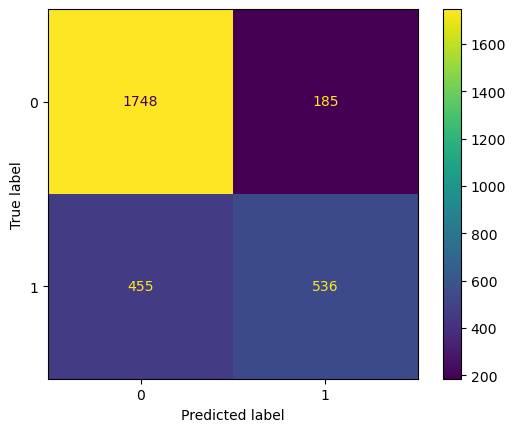

TPR or Recall:  54.08678102926338
precision:  74.34119278779472
Accuracy:  78.11217510259918
TNR or Specifity:  90.42938437661667


In [57]:
''' Best Parameters: learning_rate=0.05, max_depth=5, n_estimators=950 '''

#Evaluating the model with best params deduced above:

model = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=950) #initializing the model
model.fit(trainX, trainy)       #Fitting the model on train set


md_probs = model.predict_proba(testX)   #Predicting Probabilities of test set
md_probs = md_probs[:,1]             
md_auc = roc_auc_score(testy, md_probs) #Calculating AUC-ROC of test dataset
print('Test AUC-ROC %.3f % ', md_auc)   

pred = model.predict(testX)     #Predicting class labels of test set
confusion = confusion_matrix(testy, pred)   #Creating Confusion Matrix of test set

display = ConfusionMatrixDisplay(confusion_matrix = confusion)   #Displaying the confusion matrix of test set
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)  #Recall Calculation
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)   #Precision Calculation
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100) #Accuracy Calculation
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100) #Specificity Calculation

###  XGBoost Classifier

#### Gridsearch: Trial 1

Since it is computationally expensive and time-taking to try every possible iteration in grid search,
a few values are tried with long ranges then the best params obtained for it are tuned further in the next iterations

In [58]:
#Cv = 5 means the data is split into 5 folds using Stratified K-Fold and then the test performance is evaluated
#Scoring metric AUC-ROC is used for evaluation


params = {
     'n_estimators': [ 100, 300, 500, 700, 900],
     'learning_rate':[0.1, 0.2]}

grid = GridSearchCV(estimator=XGBClassifier(), param_grid=params, verbose=3, cv=5, n_jobs=-1, scoring = 'roc_auc')
grid.fit(trainX, trainy)
print(grid.best_estimator_) #Printing best paramaters

Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)


#### Gridsearch: Trial 2

In [59]:
#Cv = 5 means the data is split into 5 folds using Stratified K-Fold and then the test performance is evaluated
#Scoring metric AUC-ROC is used for evaluation

params = {
     'n_estimators': [ 200, 300, 400],
     'learning_rate':[0.05, 0.1]}

grid = GridSearchCV(estimator=XGBClassifier(), param_grid=params, verbose=3, cv=5, n_jobs=-1, scoring = 'roc_auc')
grid.fit(trainX, trainy)
print(grid.best_estimator_) #Printing best paramaters

Fitting 5 folds for each of 6 candidates, totalling 30 fits
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)


Test AUC-ROC %.3f %  0.8474804017325094


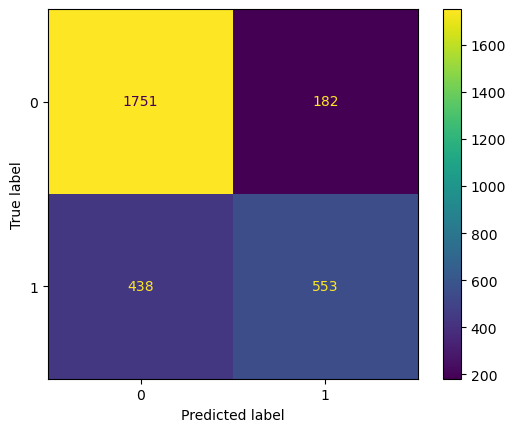

TPR or Recall:  55.80221997981837
precision:  75.23809523809524
Accuracy:  78.79616963064295
TNR or Specifity:  90.58458354888774


In [60]:
''' Best Parameters: learning_rate=0.1, n_estimators=300 '''

#Evaluating the model with best params deduced above:

model = XGBClassifier(learning_rate=0.1, n_estimators=300) #Initializing the model
model.fit(trainX, trainy)       #Fitting the model on train set 


md_probs = model.predict_proba(testX)   #Predicting Probabilities of test set
md_probs = md_probs[:,1]             
md_auc = roc_auc_score(testy, md_probs) #Calculating AUC-ROC of test dataset
print('Test AUC-ROC %.3f % ', md_auc)   

pred = model.predict(testX)     #Predicting class labels of test set
confusion = confusion_matrix(testy, pred)   #Creating Confusion Matrix of test set

display = ConfusionMatrixDisplay(confusion_matrix = confusion)   #Displaying the confusion matrix of test set
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)  #Recall Calculation
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)   #Precision Calculation
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100) #Accuracy Calculation
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100) #Specificity Calculation

#### Best Parameters for each Algorithm

    1. LogisticRegression(class_weight = 'balanced') AUC-ROC: 0.8539
    2. XGBClassifier(learning_rate=0.1, n_estimators=400) AUC-ROC: 0.8484
    3. svm.SVC(C = 1, gamma = 1, probability  = True)  AUC-ROC: 0.8483
    4. GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=950) AUC-ROC: 0.8458 
    5. RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=800)  AUC-ROC: 0.8417
    6. MultinomialNB(alpha=1)  AUC-ROC: 0.8123

###### So, it can be seen that Logistic Regression, XGBoosting Classifier, Support Vector Machine, Random Forest Classifier and Gradient Boosting Classifier are working best for our data as they have the best AUC-ROC.
   

Now as bagging approach, lets try a voting classifier combining our best models above together:

### 7.7 Voting Classifier

#### Trial 1 (Using models above that gave the best AUC-ROC)

[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.838 total time=   5.0s
[CV 4/5] END learning_rate=0.1, n_estimators=300;, score=0.846 total time=  14.4s
[CV 2/5] END learning_rate=0.1, n_estimators=700;, score=0.839 total time=  33.0s
[CV 5/5] END learning_rate=0.1, n_estimators=900;, score=0.856 total time=  43.1s
[CV 3/5] END learning_rate=0.2, n_estimators=700;, score=0.852 total time=  32.9s
[CV 1/5] END learning_rate=0.05, n_estimators=200;, score=0.849 total time=  10.7s
[CV 2/5] END learning_rate=0.05, n_estimators=400;, score=0.842 total time=  20.0s
[CV 5/5] END learning_rate=0.1, n_estimators=200;, score=0.860 total time=   9.7s
[CV 3/5] END learning_rate=0.1, n_estimators=400;, score=0.861 total time=  16.6s
[Voting] ...................... (2 of 5) Processing svm, total=  56.6s
Test AUC-ROC %.3f %  0.8586194529868663


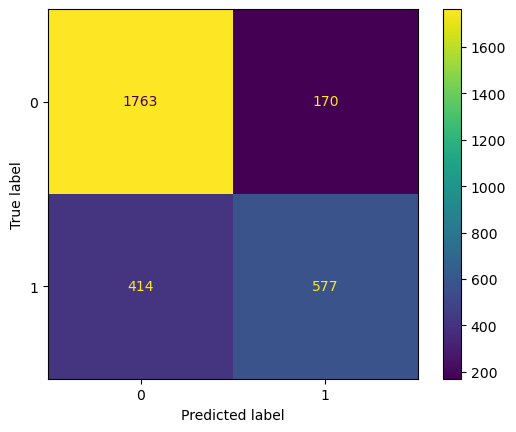

TPR or Recall:  58.224016145307765
precision:  77.24230254350736
Accuracy:  80.02735978112176
TNR or Specifity:  91.20538023797207


In [61]:

clf1 = LogisticRegression(class_weight = 'balanced')  #Model 1
clf2 =  svm.SVC(C = 1, gamma = 1, probability = True) #Model 2
clf3 =  GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=950) #Model 3
clf4 =  XGBClassifier(learning_rate=0.1, n_estimators=400)  #Model 4
clf5 = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=800) #Model 5

model = vc = VotingClassifier(estimators = [('lr', clf1), ('svm', clf2), ('gb', clf3),('xgb', clf4),('rf', clf5)],
                      voting = 'soft', n_jobs = -1, verbose = True) #Initializing the Voting Classifier Model

model.fit(trainX, trainy)       #Fitting the model on train set 


md_probs = model.predict_proba(testX)   #Predicting Probabilities of test set
md_probs = md_probs[:,1]             
md_auc = roc_auc_score(testy, md_probs) #Calculating AUC-ROC of test dataset
print('Test AUC-ROC %.3f % ', md_auc)   

pred = model.predict(testX)     #Predicting class labels of test set
confusion = confusion_matrix(testy, pred)   #Creating Confusion Matrix of test set

display = ConfusionMatrixDisplay(confusion_matrix = confusion)   #Displaying the confusion matrix of test set
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)  #Recall Calculation
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)   #Precision Calculation
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100) #Accuracy Calculation
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100) #Specificity Calculation

### 7.8 Neural Network

Finally, lets try building a neural network to see if it performs close to our best models above:

###### Architecture: 
    1. Input layer with shape of our sparse input matrix
    2. 1 hidden layer of 64 neurons and Relu activation function
    3. 1 hidden layer of 32 neurons and Relu activation function
    4. Output layer with sigmoid activation function
###### Specs:
    1. optimizer = Adam
    2. Loss Function = Binary cross-entropy loss
    3. Metric = AUC-ROC

2022-12-27 13:38:03.917729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-27 13:38:03.918940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Epoch 1/15


2022-12-27 13:38:05.788757: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-27 13:38:06.087274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


366/366 - 6s - loss: 0.4909 - auc: 0.8060 - 6s/epoch - 15ms/step
Epoch 2/15
366/366 - 3s - loss: 0.3440 - auc: 0.9133 - 3s/epoch - 9ms/step
Epoch 3/15
366/366 - 3s - loss: 0.2748 - auc: 0.9463 - 3s/epoch - 9ms/step
Epoch 4/15
366/366 - 3s - loss: 0.2208 - auc: 0.9657 - 3s/epoch - 8ms/step
Epoch 5/15
366/366 - 3s - loss: 0.1674 - auc: 0.9804 - 3s/epoch - 8ms/step
Epoch 6/15
366/366 - 3s - loss: 0.1159 - auc: 0.9907 - 3s/epoch - 8ms/step
Epoch 7/15
366/366 - 3s - loss: 0.0761 - auc: 0.9963 - 3s/epoch - 8ms/step
Epoch 8/15
366/366 - 3s - loss: 0.0484 - auc: 0.9985 - 3s/epoch - 8ms/step
Epoch 9/15
366/366 - 3s - loss: 0.0333 - auc: 0.9990 - 3s/epoch - 8ms/step
Epoch 10/15
366/366 - 3s - loss: 0.0247 - auc: 0.9996 - 3s/epoch - 8ms/step
Epoch 11/15
[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.854 total time=   5.1s
[CV 3/5] END learning_rate=0.1, n_estimators=500;, score=0.862 total time=  23.7s
[CV 1/5] END learning_rate=0.1, n_estimators=900;, score=0.856 total time=  42.8s
[

2022-12-27 13:38:53.763520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - 0s 3ms/step
Test AUC-ROC %.3f %  0.7925553990049086
92/92 [==============================] - 0s 3ms/step


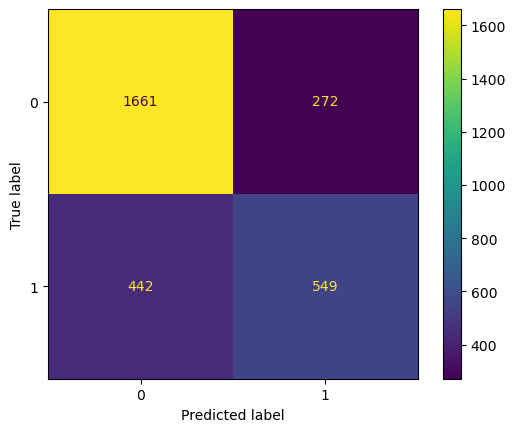

TPR or Recall:  55.39858728557013
precision:  66.86967113276492
Accuracy:  75.5813953488372
TNR or Specifity:  85.9286083807553
[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.836 total time=   5.0s
[CV 5/5] END learning_rate=0.1, n_estimators=300;, score=0.861 total time=  14.4s
[CV 3/5] END learning_rate=0.1, n_estimators=700;, score=0.860 total time=  33.4s
[CV 1/5] END learning_rate=0.2, n_estimators=100;, score=0.853 total time=   5.1s
[CV 2/5] END learning_rate=0.2, n_estimators=100;, score=0.838 total time=   4.9s
[CV 5/5] END learning_rate=0.2, n_estimators=100;, score=0.859 total time=   4.9s
[CV 3/5] END learning_rate=0.2, n_estimators=300;, score=0.857 total time=  14.8s
[CV 4/5] END learning_rate=0.2, n_estimators=500;, score=0.841 total time=  23.8s
[CV 2/5] END learning_rate=0.2, n_estimators=900;, score=0.825 total time=  38.1s
[CV 2/5] END learning_rate=0.05, n_estimators=300;, score=0.840 total time=  15.4s
[CV 4/5] END learning_rate=0.05, n_estimators=400;,

In [62]:
model =Sequential([Input(shape=(11269,)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation = 'sigmoid')
    ])  #Initializing the Neural Network
model.compile(loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam', metrics=[tf.keras.metrics.AUC(from_logits=True)])  #Configuring its parameters

model.fit(trainX.toarray(), trainy, epochs=15, verbose = 2)   #Fitting the data to our network 


md_probs = model.predict(testX.toarray()) #Predicting the test set's probabilities
md_auc = roc_auc_score(testy, md_probs) #Calculating AUC-ROC of test set
print('Test AUC-ROC %.3f % ', md_auc)

pred = model.predict(testX.toarray())  #Predicting the test set's probabilities

predictions = (pred >= 0.5).astype(bool)  #Converting probabilities to labels by defininig a 0.5 threshold
confusion = confusion_matrix(testy, predictions) #Creating Confusion Matrix of test set

display = ConfusionMatrixDisplay(confusion_matrix = confusion)   #Displaying the confusion matrix of test set
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)  #Recall Calculation
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)   #Precision Calculation
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100) #Accuracy Calculation
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100) #Specificity Calculation


###### Since  neural network did not give a good result, the best results were obtained by a voting classifier tried in trial 1. The voting classifier combined all the best parameters of each model that gave us a good AUC-ROC

## 8. Best Model

[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.850 total time=   5.1s
[CV 2/5] END learning_rate=0.1, n_estimators=500;, score=0.842 total time=  23.6s
[CV 4/5] END learning_rate=0.1, n_estimators=700;, score=0.845 total time=  33.4s
[CV 3/5] END learning_rate=0.2, n_estimators=100;, score=0.853 total time=   5.1s
[CV 1/5] END learning_rate=0.2, n_estimators=300;, score=0.858 total time=  14.7s
[CV 2/5] END learning_rate=0.2, n_estimators=500;, score=0.831 total time=  23.7s
[CV 5/5] END learning_rate=0.2, n_estimators=700;, score=0.849 total time=  31.7s
[CV 4/5] END learning_rate=0.05, n_estimators=200;, score=0.838 total time=  10.7s
[CV 1/5] END learning_rate=0.05, n_estimators=400;, score=0.856 total time=  20.2s
[CV 2/5] END learning_rate=0.1, n_estimators=300;, score=0.844 total time=  14.5s
[CV 5/5] END learning_rate=0.1, n_estimators=400;, score=0.861 total time=  14.8s
[Voting] ....................... (3 of 5) Processing gb, total= 2.7min
[Voting] ................

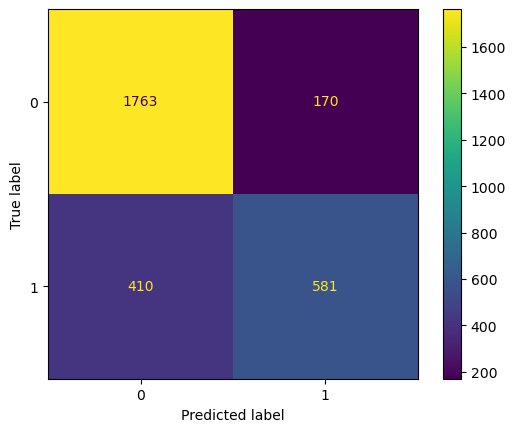

TPR or Recall:  58.627648839556
precision:  77.3635153129161
Accuracy:  80.1641586867305
TNR or Specifity:  91.20538023797207


In [63]:

clf1 = LogisticRegression(class_weight = 'balanced')  #Model 1
clf2 =  svm.SVC(C = 1, gamma = 1, probability = True) #Model 2
clf3 =  GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=950) #Model 3
clf4 =  XGBClassifier(learning_rate=0.1, n_estimators=400)  #Model 4
clf5 = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=800) #Model 5

model = vc = VotingClassifier(estimators = [('lr', clf1), ('svm', clf2), ('gb', clf3),('xgb', clf4),('rf', clf5)],
                      voting = 'soft', n_jobs = -1, verbose = True) #Initializing the Voting Classifier Model

model.fit(trainX, trainy)       #Fitting the model on train set 


md_probs = model.predict_proba(testX)   #Predicting Probabilities of test set
md_probs = md_probs[:,1]             
md_auc = roc_auc_score(testy, md_probs) #Calculating AUC-ROC of test dataset
print('Test AUC-ROC %.3f % ', md_auc)   

pred = model.predict(testX)     #Predicting class labels of test set
confusion = confusion_matrix(testy, pred)   #Creating Confusion Matrix of test set

display = ConfusionMatrixDisplay(confusion_matrix = confusion)   #Displaying the confusion matrix of test set
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)  #Recall Calculation
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)   #Precision Calculation
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100) #Accuracy Calculation
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100) #Specificity Calculation

##### This is the ultimate best model for our dataset which gave the best AUC-ROC. Now we can tweak the probability threshold to balance the precision recall tradeoff.

### 8.1 Finding Optimum Probability Threshold of Best model

#### Trial 1: 0.2 probability Threshold

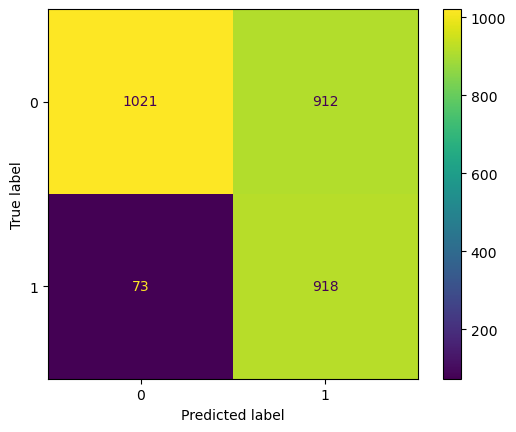

TPR or Recall:  92.63370332996973
precision:  50.1639344262295
Accuracy:  66.31326949384405
TNR or Specifity:  52.819451629591306


In [64]:
predictions = (md_probs >= 0.2).astype(bool)
confusion = confusion_matrix(testy, predictions)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100)
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100)

#### Trial 2: 0.40 probability Threshold

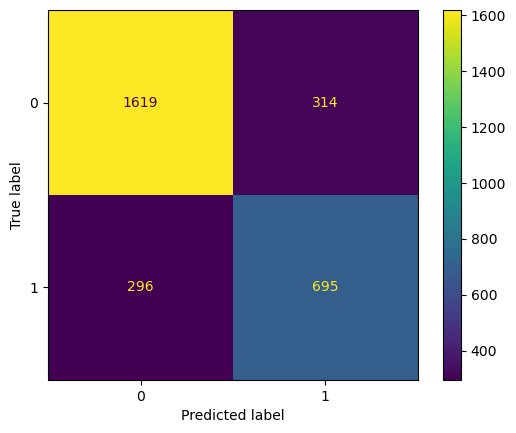

TPR or Recall:  70.13118062563068
precision:  68.8800792864222
Accuracy:  79.13816689466483
TNR or Specifity:  83.75581996896017


In [65]:
predictions = (md_probs >= 0.40).astype(bool)
confusion = confusion_matrix(testy, predictions)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("TPR or Recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)
print("Accuracy: ", ((confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]))*100)
print("TNR or Specifity: ", (confusion[0][0]/(confusion[0][1] +confusion[0][0]))*100)

###### Threshold probability of deployment of our model should be near to 0.4 as it can be considered a best compromise between Recall and Specificity. In our use-case, positive and negative ratings of a course are both important for their own reasons. 
###### Predicting correct course rating whether negative or positive can help us identify what impact the course had on the student and what changes needs to be made if the impact is negative!

### Appendix A: Running Classification only on reviews features (Experiment)

In [66]:
trainX, testX, trainy, testy = train_test_split(df_tfidf, df_imputated['course_rating'], test_size=0.2, random_state=43) #Train test split

Decision Tree Classifier :  0.6324227932405617
Logistic Regression :  0.823176566334465
K-Nearest Neighbors Classifier :  0.6618448603390159
Random Forest Classifier :  0.7976775459215714
Gradient Boosting Classifier :  0.7776762721712172
Naive Bayes :  0.7913662173216476
Support Vector Machine :  0.7913662173216476


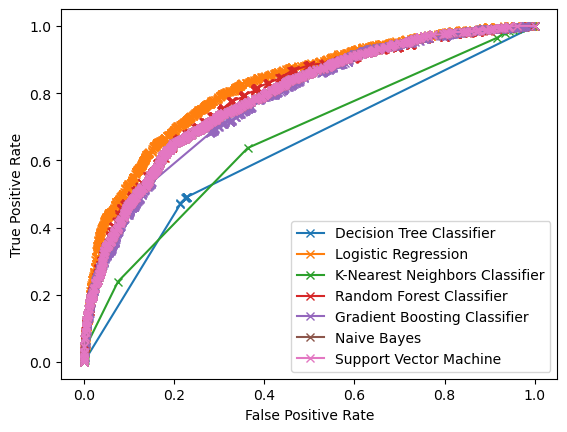

In [67]:
dt = DecisionTreeClassifier()    #Simple Decision Tree Classifier
fitting_model(dt, 'Decision Tree Classifier')

lr = LogisticRegression()       #Simple Logistic Regression
fitting_model(lr, 'Logistic Regression')

knn = KNeighborsClassifier(n_neighbors = 20, n_jobs = -1)   #K Nearest Neighbors Classifier with 20 neighbors
fitting_model(knn, 'K-Nearest Neighbors Classifier')

rf = RandomForestClassifier()   #Simple Random Forest Classifier 
fitting_model(rf, 'Random Forest Classifier')

gb = GradientBoostingClassifier()   #Simple Random Forest Classifier 
fitting_model(gb, 'Gradient Boosting Classifier')

mnb = MultinomialNB()   #Multinomial Naive bayes Classifier
fitting_model(mnb, 'Naive Bayes')

svc = svm.SVC(kernel = 'linear', C =1 , gamma = 'auto', probability = True)    #Support Vector Machine Classifier
fitting_model(mnb, 'Support Vector Machine')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()